In [123]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
# import math

# Load your dataset
data = pd.read_excel('test data.xlsx')  # Replace 'your_data.csv' with your actual data file



In [124]:
# Split the data into train and test sets
train_data = data.iloc[:228]  # Use the first 228 rows as the train set
test_data = data.iloc[228:]  # Use the last 24 rows as the test set



In [125]:
# Define hyperparameters
input_size = 1  # Assuming you have only one feature
output_size = 1  # Forecasting a single value
hidden_size = 32  # Adjust as needed
learning_rate = 0.003  # Adjust as needed
num_epochs = 100  # Adjust as needed




In [126]:
# Convert data to PyTorch tensors
X_train = torch.Tensor(train_data['Bãi Cháy'].values).reshape(-1, input_size, 1)
y_train = torch.Tensor(train_data['Bãi Cháy'].values).reshape(-1, output_size, 1)

X_test = torch.Tensor(test_data['Bãi Cháy'].values).reshape(-1, input_size, 1)
y_test = torch.Tensor(test_data['Bãi Cháy'].values).reshape(-1, output_size, 1)


In [127]:
class CNN1D(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CNN1D, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=16, kernel_size=1)  # Adjust the kernel size
        self.fc1 = nn.Linear(in_features=16, out_features=32)
        self.fc2 = nn.Linear(in_features=32, out_features=output_size)
        
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool1d(x, kernel_size=1)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [128]:
# Initialize the model, loss function, and optimizer
model = CNN1D(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [129]:
# Training the model
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


RuntimeError: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size

[4.080e+01 5.830e+01 3.920e+01 5.110e+01 4.290e+01 1.870e+02 2.127e+02
 4.268e+02 4.272e+02 3.221e+02 9.800e+00 5.000e-01 6.970e+01 1.448e+02
 4.930e+01 2.470e+01 2.917e+02 1.829e+02 3.964e+02 7.084e+02 4.612e+02
 2.102e+02 3.490e+01 1.500e+00]


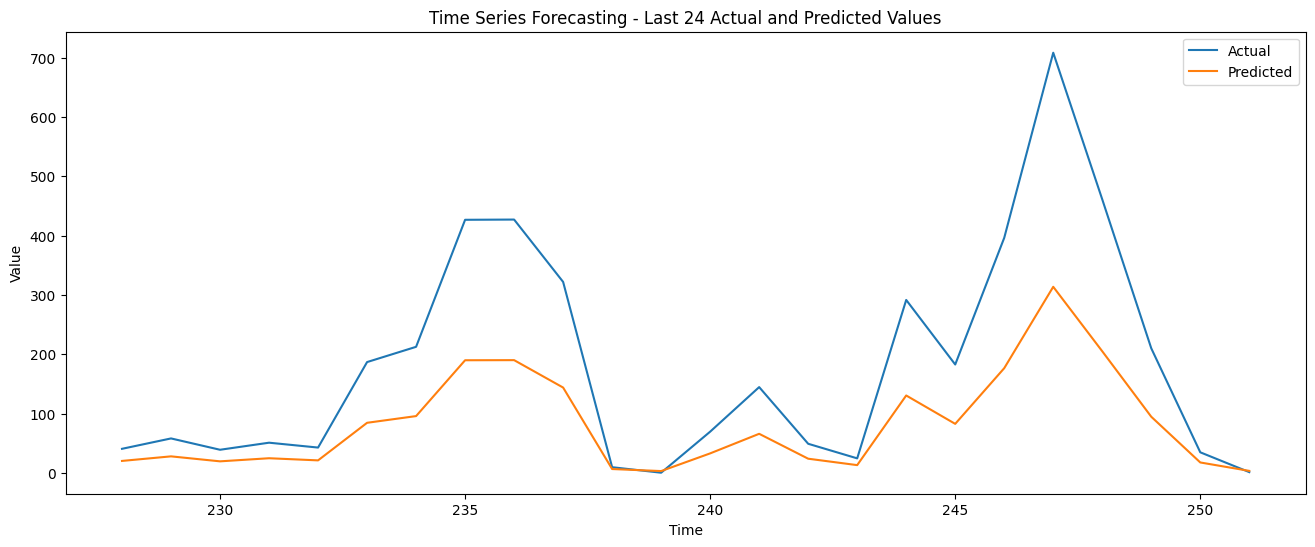

In [ ]:
# Test the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    
# Convert the test outputs to a NumPy array for plotting
test_outputs = test_outputs.view(-1).numpy()
actual_value = data['Bãi Cháy'].values[-24:]
print(actual_value)
# print(test_outputs)
# Plot the predictions
# Plot the predictions
# plt.figure(figsize=(12, 6))
# plt.plot(range(228, 252), test_outputs, label='Predicted')
# plt.plot(data['Bãi Cháy'].values[-24:], label='Actual')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.legend()
# plt.title('Time Series Forecasting')
# plt.show()

# Plot the last 24 actual values and predicted values on the entire screen
plt.figure(figsize=(16, 6))  # Adjust the figure size
plt.plot(range(228, 252), actual_value, label='Actual')
plt.plot(range(228, 252), test_outputs, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Time Series Forecasting - Last 24 Actual and Predicted Values')
plt.show()


In [ ]:
import math
squared_errors = [(actual - predicted) ** 2 for actual, predicted in zip(actual_value, test_outputs)]
mse = sum(squared_errors) / len(actual_value)

# Calculate Root Mean Square Error (RMSE)
rmse = math.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = sum([abs(actual - predicted) for actual, predicted in zip(actual_value, test_outputs)]) / len(actual_value)

print(f"Mean Square Error (MSE): {mse}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Square Error (MSE): 20757.096746755247
Root Mean Square Error (RMSE): 144.07323397062777
Mean Absolute Error (MAE): 100.51513438820838
